In [1]:
import numpy as np
from matplotlib        import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
from sklearn import datasets
from sklearn.manifold import Isomap

digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer!<br>
**Elena's predictions:**
\begin{matrix}
9&9&8&4&2&6&9\\
4&9&4&0&6&1&7\\
6&9&5&4&4&9&4\\
0&5&4&7&7&9&3\\
2&1&0&8&3&9&6\\
1&1&2&0&5&4&4\\
9&6&2&6&1&0&0
\end{matrix}
After seeing some labels: <br>
**Elena's second predictions:**
\begin{matrix}
8&9&8&4&2&6&9\\
4&9&4&0&6&1&7\\
6&9&5&4&4&8&4\\
0&5&4&2&7&9&5\\
2&1&0&8&3&9&6\\
1&1&2&0&5&4&4\\
9&6&2&6&1&0&0
\end{matrix}
**True values:**
\begin{matrix}
8&9&8&1&2&6&9\\
1&9&4&0&6&1&7\\
6&9&5&4&4&8&4\\
0&5&6&8&9&9&3\\
2&1&0&8&3&9&6\\
1&1&2&0&5&4&4\\
9&6&2&6&1&0&0
\end{matrix}
<br>
My initial accuracy is of $(49-7)/49\sim0.857$. <br>
My accuracy after 'training' (seeing some labels) is of $(49-6)/49\sim0.878$. <br>
The LinearRegressor is better! (see below)

2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  

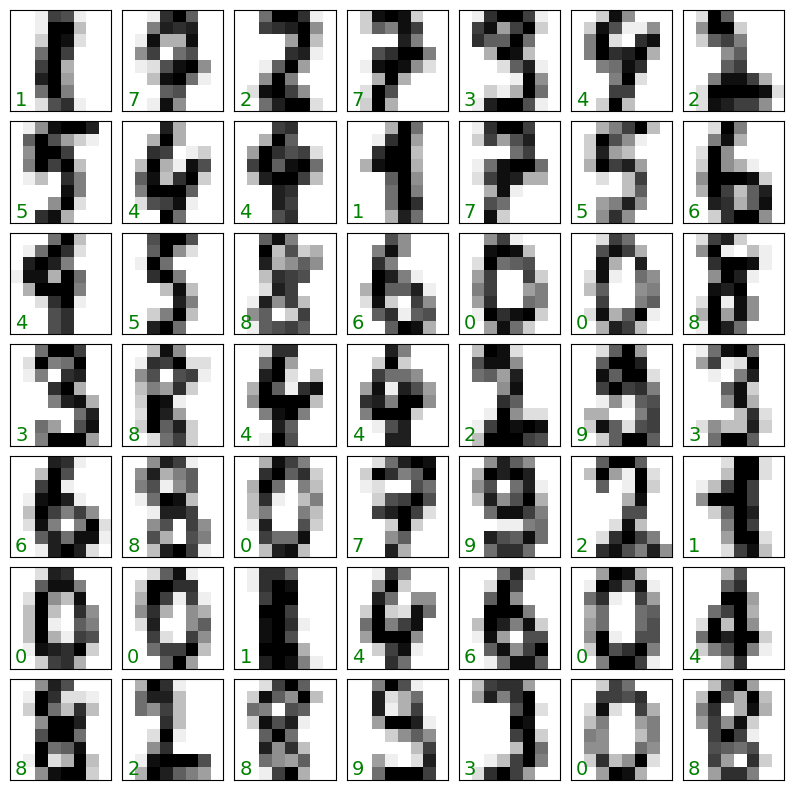

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14) #if (ytest[i] == test_pred[i]) else 'red'
    ax.set_xticks([])
    ax.set_yticks([])

Ok so the data is simply each pixel value within an $8\times 8$ grid.  For this analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

In [4]:
# The labels
print(digits.target)
print(digits.target[0])

[0 1 2 ... 8 9 8]
0


### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).

In [5]:
# return_X_y=True to return the features (X) and the target labels (y) separately
X, _ = datasets.load_digits(return_X_y=True)
X.shape

(1797, 64)

In [6]:
# n_components is the number of dimensions into which data is reduced
# n_neighbors is the number of nearest neighbors to consider of a point
# in pratice, isomaps takes the 10 nearest points to a point and build a graph to undestand the underlying manifold structure (it preserves distances)
embedding     = Isomap(n_components=2, n_neighbors=10)
X_transformed = embedding.fit_transform(X)
print(X_transformed.shape)

(1797, 2)


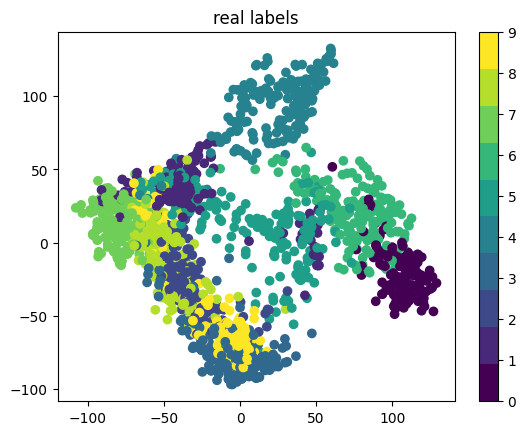

In [7]:
formatter = plt.FuncFormatter(lambda i, *args: digits.target_names[int(i)])
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],  c=_, cmap=ListedColormap(plt.colormaps['viridis'](np.linspace(0, 1, 10))))
plt.title('real labels')
plt.colorbar(ticks=[0, 1, 2,3,4,5,6,7,8,9], format=formatter)
plt.show()

We can see some classes that are easily distinguished from the others, while for others there is some confusion and overlapping. <br>
This tells us that a supervised classification algorithms can perform well.

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size = 0.2) #train_size automatically set to 0.8

In [10]:
xtrain.shape

(1437, 64)

In [11]:
xtest.shape

(360, 64)

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

In [12]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression is a linear model with one decision boundary that separates the classes
# difference with neural networks: no hidden layers

In [13]:
# solver='sag' is the algorithm used for optimization, it's the stochastic average gradient descend
# .fit() is to train the logisticregression on the train dataset
clf = LogisticRegression(solver='sag', max_iter=2000).fit(xtrain, ytrain)

In [14]:
# predict to new, unseen data
train_pred = clf.predict(xtrain)
test_pred  = clf.predict(xtest)

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

In [15]:
from sklearn.metrics import accuracy_score
print('test accuracy = ', accuracy_score(ytest,test_pred))
print('train accuracy = ', accuracy_score(ytrain,train_pred))

test accuracy =  0.9555555555555556
train accuracy =  1.0


I can observe that the accuracy on the train dataset is 1. This is because the model is fit/trained on the trained dataset, so they are data that it already knows! <br>
Instead, for the test dataset it tries to predict on new, unseen data. So, the accuracy is lower.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?

In [16]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
c_m = confusion_matrix(ytest, test_pred)
classes = ['0','1','2','3','4','5','6','7','8','9']
a_ = [[str(cell) for cell in row] for row in c_m]
horizontal = ['True  /  Pred'] + classes
tabella = [[col] + row for col, row in zip(classes, a_)]
tabulate(tabella, headers = horizontal, tablefmt='html', numalign='center')

True / Pred,0,1,2,3,4,5,6,7,8,9
0,34,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,1,0
2,0,0,28,0,0,0,0,0,0,0
3,0,0,0,40,0,1,0,0,0,0
4,0,0,0,0,33,0,0,0,1,0
5,0,0,0,0,1,33,0,0,0,3
6,0,0,0,0,0,1,36,0,0,0
7,0,0,0,0,1,0,0,34,1,0
8,0,2,0,0,1,0,0,1,35,0
9,0,0,0,0,0,1,0,0,1,37


LinearRegression only caputures linear relashionships, for this hand-written dataset maybe it's better to use a neural network to classify the digits.